In [ ]:
import os
import pandas as pd
from pathlib import Path

MODELS_DIR = 
if os.path.exists(MODELS_DIR / "all_cross_results" / "cross_dataset_validation_results.csv"):
    curr_csv = pd.read_csv(MODELS_DIR / "all_cross_results" / "cross_dataset_validation_results.csv")
    evaluated_paths = curr_csv["checkpoint"].tolist()

In [71]:
"""
report_cross_results.py
────────────────────────
Visualise & summarise cross-dataset results.
  • Heat-map   : mean accuracy per transfer direction
  • Box-plots  : accuracy spread per backbone
  • Console    : two tables
        1. mean over folds for each Train→Eval pair
        2. mean over folds for each (Model × Train→Eval) pair
"""

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

CSV = Path("cross_dataset_validation_results.csv")
assert CSV.exists(), f"CSV not found: {CSV}"

summary_cols = ["accuracy", "f1_score", "precision", "recall", "specificity"]

df = pd.read_csv(CSV)
df["train-val"] = df["trained_on"] + " into " + df["validated_on"]  
print(df.columns)


Index(['checkpoint', 'model_backbone', 'trained_on', 'training_fold',
       'validated_on', 'accuracy', 'f1_score', 'precision', 'recall',
       'specificity', 'train-val'],
      dtype='object')


In [86]:
df_same = df[df["trained_on"] == df["validated_on"]]
display(df_same[df_same['trained_on'] == 'herlev'].groupby("model_backbone")[summary_cols].std())

for dataset in df['trained_on'].unique():
    print(dataset)

    display(df_same[df_same['trained_on'] == dataset].groupby("model_backbone")[summary_cols].mean().sort_values(by='recall',ascending=False))

,accuracy,f1_score,precision,recall,specificity
model_backbone,,,,,
efficientnet_b0,0.012546,0.007944,0.016063,0.008029,0.049763
efficientnet_b1,0.024417,0.015003,0.037330,0.030248,0.127227
efficientnet_b2,0.004477,0.003064,0.010910,0.011535,0.034960
efficientnet_b3,0.006785,0.004541,0.016099,0.019493,0.058591
mobilenetv2_100,0.023645,0.015332,0.021837,0.020521,0.074911
mobilenetv4_conv_small.e2400_r224_in1k,0.008913,0.005927,0.008732,0.010277,0.029159
tv_shufflenet_v2_x1_0,0.014850,0.014562,0.019964,0.054747,0.112555
tv_squeezenet1_1,0.046521,0.051505,0.056637,0.146926,0.301483


apacc


,accuracy,f1_score,precision,recall,specificity
model_backbone,,,,,
efficientnet_b2,0.895266,0.565957,0.412389,0.901903,0.894722
efficientnet_b0,0.891363,0.550429,0.400602,0.879493,0.892334
efficientnet_b3,0.890371,0.540472,0.395913,0.852008,0.893511
efficientnet_b1,0.883493,0.522004,0.378466,0.841015,0.886970
mobilenetv2_100,0.871497,0.494440,0.351991,0.830867,0.874823
mobilenetv4_conv_small.e2400_r224_in1k,0.864747,0.419445,0.310140,0.664693,0.881121
tv_shufflenet_v2_x1_0,0.884997,0.134489,0.200075,0.158985,0.944419
tv_squeezenet1_1,0.913820,0.033610,0.032994,0.034249,0.985811


herlev


,accuracy,f1_score,precision,recall,specificity
model_backbone,,,,,
tv_shufflenet_v2_x1_0,0.792371,0.870006,0.805761,0.948148,0.358763
mobilenetv2_100,0.875749,0.918198,0.891102,0.947407,0.676289
mobilenetv4_conv_small.e2400_r224_in1k,0.882289,0.921849,0.901075,0.943704,0.711340
efficientnet_b1,0.876294,0.917874,0.900362,0.937778,0.705155
efficientnet_b3,0.872480,0.915265,0.895654,0.936296,0.694845
efficientnet_b0,0.890463,0.925682,0.924871,0.926667,0.789691
efficientnet_b2,0.880654,0.918613,0.921898,0.915556,0.783505
tv_squeezenet1_1,0.727520,0.808891,0.831198,0.806667,0.507216


sipakmed


,accuracy,f1_score,precision,recall,specificity
model_backbone,,,,,
efficientnet_b1,0.996049,0.996715,0.996717,0.996715,0.995046
efficientnet_b0,0.990370,0.992012,0.989387,0.994661,0.983901
efficientnet_b2,0.982469,0.985415,0.985230,0.985626,0.977709
mobilenetv4_conv_small.e2400_r224_in1k,0.986914,0.989069,0.993387,0.984805,0.990093
efficientnet_b3,0.961235,0.967962,0.961896,0.974127,0.941796
mobilenetv2_100,0.974815,0.978830,0.988684,0.969199,0.983282
tv_squeezenet1_1,0.907901,0.921250,0.947048,0.896920,0.924458
tv_shufflenet_v2_x1_0,0.891358,0.902503,0.979848,0.836550,0.973994


In [69]:

# ────────────────────────────────────────────────────────────────
# 0️⃣  Console summaries
# ────────────────────────────────────────────────────────────────
summary_cols = ["accuracy", "f1_score", "precision", "recall", "specificity"]

# (A) mean over the 5 folds for each transfer direction
pair_stats = (
    df.groupby("train-val")[summary_cols]
      .mean()
      .round(3)
      .sort_index()
)

# (B) mean for each (backbone × transfer direction) – 5 values per cell
model_pair_stats = (
    df.groupby(["model_backbone", "train-val"])[summary_cols]
      .mean()
      .round(3)
)

print("\n=== AVERAGE OVER 5 FOLDS FOR EACH TRAIN→EVAL PAIR ===")
display(pair_stats)



=== AVERAGE OVER 5 FOLDS FOR EACH TRAIN→EVAL PAIR ===


,accuracy,f1_score,precision,recall,specificity
train-val,,,,,
apacc into herlev,0.617,0.648,0.728,0.614,0.624
apacc into sipakmed,0.611,0.581,0.632,0.601,0.627
herlev into apacc,0.783,0.121,0.133,0.223,0.829
herlev into sipakmed,0.669,0.733,0.720,0.773,0.514
sipakmed into apacc,0.504,0.176,0.112,0.661,0.491
sipakmed into herlev,0.582,0.670,0.774,0.608,0.509


In [70]:
print("\n=== AVERAGE OVER 5 FOLDS FOR EACH MODEL × TRAIN→EVAL PAIR ===")
display(model_pair_stats)


=== AVERAGE OVER 5 FOLDS FOR EACH MODEL × TRAIN→EVAL PAIR ===


accuracy  \
model_backbone                         train-val                        
efficientnet_b0                        apacc into herlev        0.751   
                                       apacc into sipakmed      0.715   
                                       herlev into apacc        0.908   
                                       herlev into sipakmed     0.719   
                                       sipakmed into apacc      0.394   
                                       sipakmed into herlev     0.506   
efficientnet_b1                        apacc into herlev        0.683   
                                       apacc into sipakmed      0.686   
                                       herlev into apacc        0.817   
                                       herlev into sipakmed     0.641   
                                       sipakmed into apacc      0.521   
                                       sipakmed into herlev     0.608   
efficientnet_b2                        apacc into herlev        0.768   
                                       apacc into sipakmed      0.637   
                                       herlev into apacc        0.893   
                                       herlev into sipakmed     0.764   
                                       sipakmed into apacc      0.578   
                                       sipakmed into herlev     0.639   
efficientnet_b3                        apacc into herlev        0.769   
                                       apacc into sipakmed      0.724   
                                       herlev into apacc        0.882   
                                       herlev into sipakmed     0.645   
                                       sipakmed into apacc      0.819   
                                       sipakmed into herlev     0.701   
mobilenetv2_100                        apacc into herlev        0.640   
                                       apacc into sipakmed      0.681   
                                       herlev into apacc        0.892   
                                       herlev into sipakmed     0.694   
                                       sipakmed into apacc      0.843   
                                       sipakmed into herlev     0.580   
mobilenetv4_conv_small.e2400_r224_in1k apacc into herlev        0.570   
                                       apacc into sipakmed      0.568   
                                       herlev into apacc        0.892   
                                       herlev into sipakmed     0.629   
                                       sipakmed into apacc      0.551   
                                       sipakmed into herlev     0.610   
tv_shufflenet_v2_x1_0                  apacc into herlev        0.463   
                                       apacc into sipakmed      0.456   
                                       herlev into apacc        0.389   
                                       herlev into sipakmed     0.592   
                                       sipakmed into apacc      0.147   
                                       sipakmed into herlev     0.539   
tv_squeezenet1_1                       apacc into herlev        0.289   
                                       apacc into sipakmed      0.422   
                                       herlev into apacc        0.589   
                                       herlev into sipakmed     0.672   
                                       sipakmed into apacc      0.182   
                                       sipakmed into herlev     0.470   

                                                             f1_score  \
model_backbone                         train-val                        
efficientnet_b0                        apacc into herlev        0.824   
                                       apacc into sipakmed      0.780   
                                       herlev into apacc        0.087   
                                       herlev

In [34]:
metrics = ["accuracy","f1_score","precision","recall","specificity"]
for metric in metrics:  
    print(metric)
    pair = df.groupby(['trained_on', 'validated_on'])[metric].mean()
    print(pair.groupby(level=0).mean().sort_values(ascending=False))
    print("-"*30)
  

accuracy
trained_on
herlev      0.726093
apacc       0.613907
sipakmed    0.542953
Name: accuracy, dtype: float64
------------------------------
f1_score
trained_on
apacc       0.614500
herlev      0.427256
sipakmed    0.423018
Name: f1_score, dtype: float64
------------------------------
precision
trained_on
apacc       0.679875
sipakmed    0.442970
herlev      0.426731
Name: precision, dtype: float64
------------------------------
recall
trained_on
sipakmed    0.634326
apacc       0.607510
herlev      0.497577
Name: recall, dtype: float64
------------------------------
specificity
trained_on
herlev      0.671225
apacc       0.625130
sipakmed    0.500182
Name: specificity, dtype: float64
------------------------------


In [35]:
for metric in metrics:
    print(metric)
    leader = (df.groupby('model_backbone')[metric]
            .mean()
            .sort_values(ascending=False))
    print(leader.head(5))
    print("-"*80)

accuracy
model_backbone
efficientnet_b3    0.756806
mobilenetv2_100    0.721688
efficientnet_b2    0.713047
efficientnet_b0    0.665494
efficientnet_b1    0.659346
Name: accuracy, dtype: float64
--------------------------------------------------------------------------------
f1_score
model_backbone
efficientnet_b3    0.586498
efficientnet_b2    0.571085
efficientnet_b0    0.533384
efficientnet_b1    0.533021
mobilenetv2_100    0.524550
Name: f1_score, dtype: float64
--------------------------------------------------------------------------------
precision
model_backbone
efficientnet_b3    0.565936
efficientnet_b2    0.564618
efficientnet_b0    0.558437
mobilenetv2_100    0.555677
efficientnet_b1    0.549166
Name: precision, dtype: float64
--------------------------------------------------------------------------------
recall
model_backbone
efficientnet_b2          0.645914
efficientnet_b0          0.635335
efficientnet_b1          0.625103
efficientnet_b3          0.623562
tv_shufflene

In [39]:
leader = (df.groupby('model_backbone')['accuracy']
            .mean()
            .sort_values(ascending=False))
print(leader.head(5))


model_backbone
efficientnet_b3    0.756806
mobilenetv2_100    0.721688
efficientnet_b2    0.713047
efficientnet_b0    0.665494
efficientnet_b1    0.659346
Name: accuracy, dtype: float64


In [47]:
from scipy.stats import friedmanchisquare
for metric in metrics:
    mat = (df.pivot_table(index=['trained_on', 'validated_on', 'training_fold'],
                          columns='model_backbone',
                          values=metric))
    stat, p = friedmanchisquare(*[mat[col].dropna() for col in mat])
    print(f"p-value = {p:.4g}")  # p < 0.05 ⇒ at least one model differs reliably


p-value = 3.022e-17
p-value = 2.256e-11
p-value = 2.344e-13
p-value = 0.02254
p-value = 0.01356


In [56]:
import pandas as pd

csv = "cross_dataset_validation_results.csv"
df  = pd.read_csv(csv)


metrics = ["accuracy", "f1_score", "precision", "recall", "specificity"]

# ------------------------------------------------------------------
# 1️⃣  average each metric over 5 folds *per* (model × direction)
# ------------------------------------------------------------------
avg = (df
       .groupby(["model_backbone", "trained_on", "validated_on"])[metrics]
       .mean()
       .reset_index())

# ------------------------------------------------------------------
# 2️⃣  rank models for every metric (lower rank = better)
# ------------------------------------------------------------------
for m in metrics:
    avg[f"rank_{m}"] = avg.groupby(["trained_on","validated_on"])[m] \
                            .rank(method="average", ascending=False)

# ------------------------------------------------------------------
# 3️⃣  compute mean rank across metrics, then across directions
# ------------------------------------------------------------------
rank_cols = [f"rank_{m}" for m in metrics]
overall = (avg
           .groupby("model_backbone")[rank_cols]
           .mean()                       # mean rank per metric
           .assign(mean_rank=lambda d: d.mean(axis=1))  # aggregate
           .sort_values("mean_rank"))

print("=== TOP-3 GENERALISERS (balanced across 5 metrics) ===")
print(overall.head(10)[["mean_rank"]])


=== TOP-3 GENERALISERS (balanced across 5 metrics) ===
                                        mean_rank
model_backbone                                   
efficientnet_b2                          3.266667
efficientnet_b0                          3.466667
efficientnet_b3                          3.666667
efficientnet_b1                          3.977778
mobilenetv2_100                          4.444444
mobilenetv4_conv_small.e2400_r224_in1k   4.800000
tv_squeezenet1_1                         6.177778
tv_shufflenet_v2_x1_0                    6.200000


In [61]:
# ----- table whose columns really are the raw metrics -------------
model_avg = (
    df.groupby("model_backbone")[metrics]     # metrics = ["accuracy", …]
      .mean()                                #   ← still has those 5 cols
)

# ----- Pareto frontier -------------------------------------------
pareto = []
for mdl in model_avg.index:
    # «dominates» = at least as good on *all* metrics, strictly better on ≥1
    better_or_equal = model_avg.ge(model_avg.loc[mdl])
    strictly_better = model_avg.gt(model_avg.loc[mdl])
    dominates = (better_or_equal & strictly_better).all(axis=1)
    if not dominates.drop(mdl).any():        # nobody dominates this model
        pareto.append(mdl)

print("Pareto-optimal models:", pareto)


Pareto-optimal models: ['efficientnet_b2', 'efficientnet_b3', 'mobilenetv2_100']


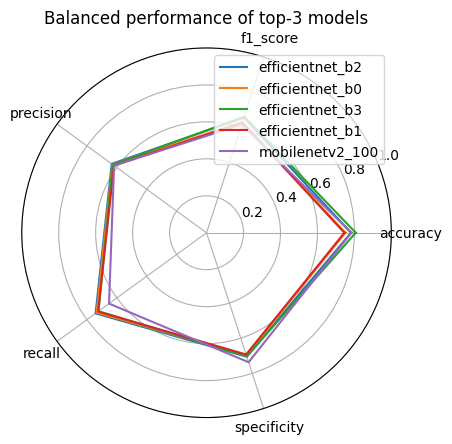

In [59]:
import matplotlib.pyplot as plt
import numpy as np

top3 = overall.head(5).index
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
for mdl in top3:
    vals = (df[df['model_backbone'] == mdl][metrics]
            .mean()
            .tolist())
    vals += vals[:1]
    ax.plot(angles, vals, label=mdl)
ax.set_xticks(angles[:-1], metrics)
ax.set_ylim(0, 1)
ax.legend(loc="upper right")
plt.title("Balanced performance of top-3 models")
plt.show()


In [62]:
rank_cols = [f"rank_{m}" for m in metrics]   # these columns exist in ‘overall’

pareto = []
for mdl in overall.index:
    dominates = overall.loc[overall.index != mdl, rank_cols] \
                       .le(overall.loc[mdl, rank_cols].values).all(axis=1)
    if not dominates.any():
        pareto.append(mdl)

print("Pareto-optimal models (using ranks):", pareto)


Pareto-optimal models (using ranks): ['efficientnet_b2', 'efficientnet_b0', 'efficientnet_b3']
